In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
obesity_data = 'c:/Users/ADMIN/Desktop/Code/activity-and-obesity/data/obesity-by-state.csv'
urban_data = 'c:/Users/ADMIN/Desktop/Code/activity-and-obesity/data/urban_connectivity.csv'

In [14]:
df1 = pd.read_csv(obesity_data)
df2 = pd.read_csv(urban_data)

In [15]:
df1.head()

,OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,California,24.2,5.327809e+12,1.451870e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06


In [16]:
df1 = df1.drop(['OBJECTID', 'Shape__Area', 'Shape__Length'], axis=1)
df1.head()

,NAME,Obesity
0,Texas,32.4
1,California,24.2
2,Kentucky,34.6
3,Georgia,30.7
4,Wisconsin,30.7


In [17]:
df1 = df1.sort_values(by="Obesity", ascending=False)
df1.head()

,NAME,Obesity
8,Louisiana,36.2
37,Alabama,35.6
30,West Virginia,35.6
24,Mississippi,35.6
2,Kentucky,34.6


In [18]:
df1.tail

<bound method NDFrame.tail of                     NAME  Obesity
8              Louisiana     36.2
37               Alabama     35.6
30         West Virginia     35.6
24           Mississippi     35.6
2               Kentucky     34.6
23              Arkansas     34.5
47                Kansas     34.2
28              Oklahoma     33.9
7              Tennessee     33.8
20              Missouri     32.4
0                  Texas     32.4
21                  Iowa     32.1
39        South Carolina     31.7
16              Nebraska     31.4
31               Indiana     31.3
10              Michigan     31.2
50          North Dakota     31.0
19              Illinois     30.8
4              Wisconsin     30.7
3                Georgia     30.7
22          South Dakota     30.4
26        North Carolina     30.1
5                 Oregon     30.1
40                 Maine     30.0
46          Pennsylvania     30.0
18                  Ohio     29.8
13                Alaska     29.8
45              De

In [19]:
df2.head()

,Unnamed: 0,Place_name,City,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
0,0,"Los Angeles, CA",Los Angeles,CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,...,17.0,64.0,4.0,33.00,33.0,1.0,0.0,133.0,0.0,0.0
1,1,"San Diego, CA",San Diego,CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,...,4.0,14.0,3.0,66.20,292.8,0.0,50.0,8.0,0.0,0.0
2,2,"San Jose, CA",San Jose,CA,50.5,40.1,61.5,945942,1018924.0,112666.0,...,2.0,6.0,1.0,75.60,37.9,0.0,0.0,42.0,0.0,0.0
3,3,"San Francisco, CA",San Francisco,CA,88.7,77.1,72.3,805235,883822.0,29892.0,...,11.0,12.0,2.0,51.35,34.0,3.0,0.0,5.0,7.0,4.0
4,4,"Fresno, CA",Fresno,CA,46.6,33.1,58.1,494665,547499.0,72537.0,...,7.0,9.0,1.0,2.00,0.0,10.0,0.0,17.0,0.0,0.0


In [20]:
state_walkability_df = df2.groupby('State')['Walk Score'].mean().reset_index() # DataFrame with average walk score of cities by state 
state_walkability_df = state_walkability_df.sort_values(by="Walk Score", ascending=False)
state_walkability_df.head(10)

,State,Walk Score
14,MA,82.80
21,NJ,81.25
24,NY,77.30
10,IL,77.20
4,DC,76.70
28,PA,68.60
27,OR,67.30
17,MN,65.90
7,HI,65.70
15,MD,64.30


In [21]:
df1.tail()

,NAME,Obesity
1,California,24.2
14,Montana,23.6
41,Hawaii,22.7
35,District of Columbia,22.1
25,Colorado,20.2


In [22]:
import us
state_abbrev_to_name = us.states.mapping('abbr', 'name')
state_walkability_df['State'] = state_walkability_df['State'].map(state_abbrev_to_name)
state_walkability_df.head()

,State,Walk Score
14,Massachusetts,82.80
21,New Jersey,81.25
24,New York,77.30
10,Illinois,77.20
4,NaN,76.70


In [23]:
merged_df = state_walkability_df.merge(df1, left_on='State', right_on='NAME')
merged_df = merged_df.drop('NAME', axis=1)
merged_df.head()

,State,Walk Score,Obesity
0,Massachusetts,82.80,24.3
1,New Jersey,81.25,25.6
2,New York,77.30,25.0
3,Illinois,77.20,30.8
4,Pennsylvania,68.60,30.0


In [24]:
correlation = merged_df['Walk Score'].corr(merged_df['Obesity'])
print(f"Correlation between Walk Score and Obesity: {correlation}")

Correlation between Walk Score and Obesity: -0.47047841339567187


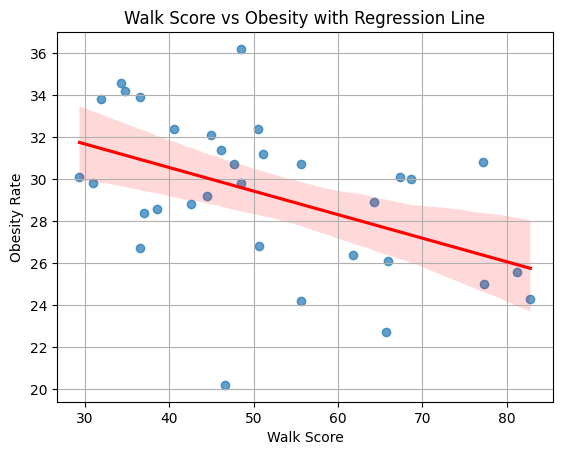

In [25]:
sns.regplot(data=merged_df, x='Walk Score', y='Obesity', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

plt.title('Walk Score vs Obesity with Regression Line')
plt.xlabel('Walk Score')
plt.ylabel('Obesity Rate')
plt.grid(True)
plt.show()
